In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from scipy import stats 
from datetime import datetime
import os
import gmaps
import warnings 
warnings.filterwarnings("ignore")

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [2]:
#path to uber csv 

file="uber.csv"

#read into data
uber_df= pd.read_csv(file)


uber_df=uber_df.sample(1000)
uber_df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
88924,15415720,2012-09-27 12:16:34.0000003,6.5,2012-09-27 12:16:34 UTC,-74.007551,40.708630,-74.015592,40.704959,1
61534,41244855,2011-12-02 22:26:03.0000003,12.9,2011-12-02 22:26:03 UTC,-73.987885,40.732246,-73.950564,40.779616,1
189468,38172772,2010-04-10 01:20:00.000000125,6.5,2010-04-10 01:20:00 UTC,-74.006913,40.730110,-73.994342,40.724775,1
90737,28611878,2015-01-05 06:02:01.0000001,30.0,2015-01-05 06:02:01 UTC,-73.949303,40.777267,-73.878639,40.880718,2
113164,39917637,2013-09-26 11:55:47.0000001,9.5,2013-09-26 11:55:47 UTC,-73.979891,40.783964,-73.959131,40.774470,1
...,...,...,...,...,...,...,...,...,...
186175,23383982,2014-01-05 12:06:00.00000062,7.5,2014-01-05 12:06:00 UTC,-73.993565,40.729200,-73.990305,40.742565,5
19223,6183251,2015-06-28 14:16:40.0000002,3.5,2015-06-28 14:16:40 UTC,-73.980339,40.742680,-73.978111,40.745930,6
4562,41416646,2011-09-23 11:08:11.0000004,8.5,2011-09-23 11:08:11 UTC,-73.998816,40.732300,-74.000708,40.736145,1
165305,48927556,2010-04-11 00:27:00.00000019,11.3,2010-04-11 00:27:00 UTC,-73.999458,40.729902,-73.982260,40.766192,1


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

pickup_lats=uber_df["pickup_latitude"]
pickup_lngs=uber_df["pickup_longitude"]
#lat_lngs=zip(pickup_lats,pickup_lngs)

uber_df["City"]="x"

for index, row in uber_df.iterrows():
    city=citipy.nearest_city(row["pickup_latitude"],row["pickup_longitude"]).city_name
    uber_df.loc[index,"City"]=city  
       
# Print the city count to confirm sufficient count
len(cities)
uber_df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,City
88924,15415720,2012-09-27 12:16:34.0000003,6.5,2012-09-27 12:16:34 UTC,-74.007551,40.708630,-74.015592,40.704959,1,new york
61534,41244855,2011-12-02 22:26:03.0000003,12.9,2011-12-02 22:26:03 UTC,-73.987885,40.732246,-73.950564,40.779616,1,new york
189468,38172772,2010-04-10 01:20:00.000000125,6.5,2010-04-10 01:20:00 UTC,-74.006913,40.730110,-73.994342,40.724775,1,new york
90737,28611878,2015-01-05 06:02:01.0000001,30.0,2015-01-05 06:02:01 UTC,-73.949303,40.777267,-73.878639,40.880718,2,edgewater
113164,39917637,2013-09-26 11:55:47.0000001,9.5,2013-09-26 11:55:47 UTC,-73.979891,40.783964,-73.959131,40.774470,1,guttenberg
...,...,...,...,...,...,...,...,...,...,...
186175,23383982,2014-01-05 12:06:00.00000062,7.5,2014-01-05 12:06:00 UTC,-73.993565,40.729200,-73.990305,40.742565,5,new york
19223,6183251,2015-06-28 14:16:40.0000002,3.5,2015-06-28 14:16:40 UTC,-73.980339,40.742680,-73.978111,40.745930,6,new york
4562,41416646,2011-09-23 11:08:11.0000004,8.5,2011-09-23 11:08:11 UTC,-73.998816,40.732300,-74.000708,40.736145,1,new york
165305,48927556,2010-04-11 00:27:00.00000019,11.3,2010-04-11 00:27:00 UTC,-73.999458,40.729902,-73.982260,40.766192,1,new york


In [4]:
# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


In [5]:
#distance 

dropoff_lats=uber_df["pickup_longitude"]
dropoff_lngs=uber_df["pickup_longitude"]

uber_df["Distance"]=0

for index, row in uber_df.iterrows():
    distance=haversine(row["pickup_latitude"],row["pickup_longitude"],\
                       row["dropoff_latitude"], row["dropoff_longitude"],to_radians=True, earth_radius=6371)
    uber_df.loc[index,"Distance"]=distance  


In [6]:
#binning 

#set time of day bins
timeofday=[0, 5, 12, 17, 24]

uber_df.pickup_datetime= pd.to_datetime(uber_df.pickup_datetime)

#labels for bins
times=["Night","Morning","Afternoon","Evening"]

uber_df['Time of Day'] = pd.cut(uber_df.pickup_datetime.dt.hour, timeofday, labels=times, right=False)


In [7]:
#remove distance 0

uber_df_cleaned=uber_df.loc[uber_df["Distance"]!=0]

uber_df_cleaned

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,City,Distance,Time of Day
88924,15415720,2012-09-27 12:16:34.0000003,6.5,2012-09-27 12:16:34+00:00,-74.007551,40.708630,-74.015592,40.704959,1,new york,0.791219,Afternoon
61534,41244855,2011-12-02 22:26:03.0000003,12.9,2011-12-02 22:26:03+00:00,-73.987885,40.732246,-73.950564,40.779616,1,new york,6.134032,Evening
189468,38172772,2010-04-10 01:20:00.000000125,6.5,2010-04-10 01:20:00+00:00,-74.006913,40.730110,-73.994342,40.724775,1,new york,1.214104,Night
90737,28611878,2015-01-05 06:02:01.0000001,30.0,2015-01-05 06:02:01+00:00,-73.949303,40.777267,-73.878639,40.880718,2,edgewater,12.948811,Morning
113164,39917637,2013-09-26 11:55:47.0000001,9.5,2013-09-26 11:55:47+00:00,-73.979891,40.783964,-73.959131,40.774470,1,guttenberg,2.042051,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
186175,23383982,2014-01-05 12:06:00.00000062,7.5,2014-01-05 12:06:00+00:00,-73.993565,40.729200,-73.990305,40.742565,5,new york,1.511290,Afternoon
19223,6183251,2015-06-28 14:16:40.0000002,3.5,2015-06-28 14:16:40+00:00,-73.980339,40.742680,-73.978111,40.745930,6,new york,0.407224,Afternoon
4562,41416646,2011-09-23 11:08:11.0000004,8.5,2011-09-23 11:08:11+00:00,-73.998816,40.732300,-74.000708,40.736145,1,new york,0.456298,Morning
165305,48927556,2010-04-11 00:27:00.00000019,11.3,2010-04-11 00:27:00+00:00,-73.999458,40.729902,-73.982260,40.766192,1,new york,4.287453,Night


## Adding in Zipcodes from Geopy and Income from Census data 

In [8]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

uber_df_cleaned["Zipcode"]=0



for index, row in uber_df_cleaned.iterrows():
    try: 
        location = geolocator.reverse(str(row["pickup_latitude"])+","+str(row["pickup_longitude"]))
        zipcode=list(location.raw.values())[7]["postcode"]
        uber_df_cleaned.loc[index,"Zipcode"]=zipcode
    
    except:
        print(str(row["pickup_latitude"])+","+str(row["pickup_longitude"])+" zipcode not found, passing... ")
        pass


40.720947,-74.01015799999998 zipcode not found, passing... 
40.720473,-74.010194 zipcode not found, passing... 
40.758848,-73.98184599999998 zipcode not found, passing... 
40.72059,-74.010154 zipcode not found, passing... 
-0.003073,0.009787 zipcode not found, passing... 
40.763836,-73.973206 zipcode not found, passing... 
40.778885,-73.962528 zipcode not found, passing... 
40.73756,-74.01530600000002 zipcode not found, passing... 
0.0,0.0 zipcode not found, passing... 
40.72942352294922,-73.99014282226562 zipcode not found, passing... 
40.758235,-73.970967 zipcode not found, passing... 


In [9]:
#where zipcodes were not found, leave behind 
zipcodez=uber_df_cleaned.loc[uber_df_cleaned["Zipcode"]!=0]

In [10]:
#average year of date times 

year=round(uber_df_cleaned.pickup_datetime.dt.year.mean(),0)
year

2012.0

In [11]:
from census import Census

# Census API Key
from api_key import c_key
c = Census(c_key, year=2012)

census_data = c.acs5.get(("NAME", "B19013_001E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B19013_001E": "Household Income",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})
census_pd

,Name,Household Income,state,Zipcode
0,ZCTA5 02655,73323.0,25,02655
1,ZCTA5 02657,46031.0,25,02657
2,ZCTA5 02659,51466.0,25,02659
3,ZCTA5 02660,48617.0,25,02660
4,ZCTA5 02663,21667.0,25,02663
...,...,...,...,...
33115,ZCTA5 97035,72883.0,41,97035
33116,ZCTA5 97037,41048.0,41,97037
33117,ZCTA5 97038,54225.0,41,97038
33118,ZCTA5 97039,33056.0,41,97039


In [12]:
zipcoded=pd.merge(zipcodez,census_pd,how="left",on="Zipcode").dropna()
zipcoded=zipcoded.loc[(zipcoded["Household Income"].astype(float))>0]

In [13]:
#count number of rides per zipcode 
byincome=zipcoded.groupby("Household Income")["fare_amount"].count()


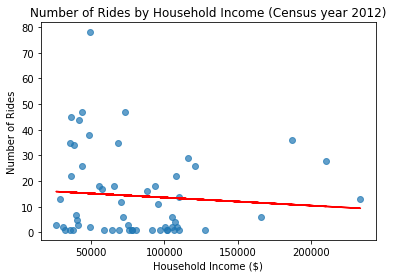

In [14]:
# Create a Scatter Plot for income and number of rides 
x_values = zipcoded["Household Income"].unique().astype(float)
y_values = byincome



slope,inte,r,p,std_err=stats.linregress(x_values,y_values)
fitline=slope*x_values + inte

plt.scatter(x_values,y_values,alpha=.7)
plt.plot(x_values,fitline,"r-")
plt.xlabel('Household Income ($)')
plt.ylabel(f'Number of Rides')

plt.title(f'Number of Rides by Household Income (Census year 2012)')

plt.show()

In [15]:
# Most Popular Pick up times & how it correlates to price (plot, basic stats dataframe) -Neil 

# Price regression on number of passengers (plot, stats)- Neil 

# Rank by cities (fare amount paid, Total distances, Most popular time of day) -Rebecca

# Where are the most popular pick up locations (map, dataframe) -Turgut 

# Where are the most popular drop off locations (map, dataframe) -Turgut

# Distance between pick up and drop off vs Price (basic stats, plot) -Daniel 

### By City: Fare Amount Paid, Most popular Time of Day, Total Distances 

In [16]:
topcities=uber_df_cleaned.groupby(["City"]).size().sort_values(ascending=False).head(5).reset_index()["City"].tolist()
topcities

['new york', 'guttenberg', 'weehawken', 'edgewater', 'woodmere']

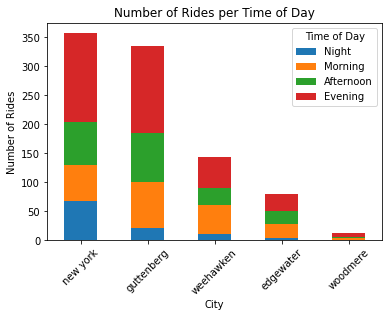

<Figure size 432x288 with 0 Axes>

In [17]:
bycities=uber_df_cleaned.groupby(["City","Time of Day"]).size()[topcities].sort_values(ascending=False).head(20).unstack()\
.plot(kind='bar', stacked=True)

# Set a title for the chart
plt.title("Number of Rides per Time of Day")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

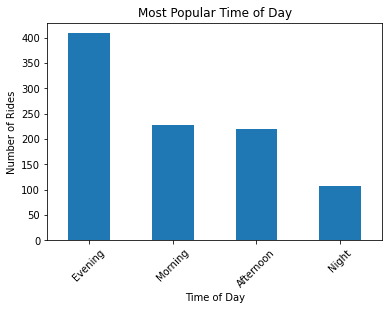

<Figure size 432x288 with 0 Axes>

In [18]:
bycities=uber_df_cleaned.groupby(["Time of Day"]).size().sort_values(ascending=False).plot(kind='bar')

# Set a title for the chart
plt.title("Most Popular Time of Day")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

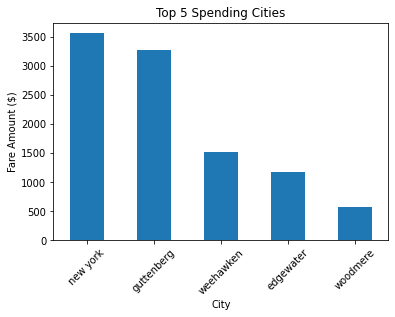

<Figure size 432x288 with 0 Axes>

In [19]:
bycities=uber_df_cleaned.groupby("City")["fare_amount"].sum().sort_values(ascending=False).head(5).plot(kind='bar')

# Set a title for the chart
plt.title("Top 5 Spending Cities")
plt.ylabel("Fare Amount ($)")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

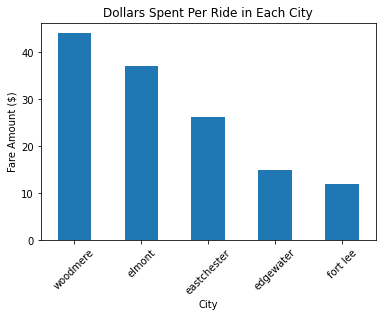

<Figure size 432x288 with 0 Axes>

In [20]:
bycities=uber_df_cleaned.groupby("City")["fare_amount"].sum()
ridespercity=uber_df_cleaned.groupby("City")["Distance"].count()

percityspent=bycities/ridespercity
percityspent.sort_values(ascending=False).head(5).plot(kind="bar")

# Set a title for the chart
plt.title("Dollars Spent Per Ride in Each City")
plt.ylabel("Fare Amount ($)")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

In [40]:
# Filter dataframe with a Distance less than 100 - Daniel
new_uber_df_cleaned = uber_df_cleaned[uber_df_cleaned['Distance'] < 100]
new_uber_df_cleaned

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,City,Distance,Time of Day,Zipcode,pickup_hour
88924,15415720,2012-09-27 12:16:34.0000003,6.5,2012-09-27 12:16:34+00:00,-74.007551,40.708630,-74.015592,40.704959,1,new york,0.791219,Afternoon,10038,12
61534,41244855,2011-12-02 22:26:03.0000003,12.9,2011-12-02 22:26:03+00:00,-73.987885,40.732246,-73.950564,40.779616,1,new york,6.134032,Evening,10003,22
189468,38172772,2010-04-10 01:20:00.000000125,6.5,2010-04-10 01:20:00+00:00,-74.006913,40.730110,-73.994342,40.724775,1,new york,1.214104,Night,10014,1
90737,28611878,2015-01-05 06:02:01.0000001,30.0,2015-01-05 06:02:01+00:00,-73.949303,40.777267,-73.878639,40.880718,2,edgewater,12.948811,Morning,10029-6408,6
113164,39917637,2013-09-26 11:55:47.0000001,9.5,2013-09-26 11:55:47+00:00,-73.979891,40.783964,-73.959131,40.774470,1,guttenberg,2.042051,Morning,10024,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186175,23383982,2014-01-05 12:06:00.00000062,7.5,2014-01-05 12:06:00+00:00,-73.993565,40.729200,-73.990305,40.742565,5,new york,1.511290,Afternoon,10003,12
19223,6183251,2015-06-28 14:16:40.0000002,3.5,2015-06-28 14:16:40+00:00,-73.980339,40.742680,-73.978111,40.745930,6,new york,0.407224,Afternoon,10016,14
4562,41416646,2011-09-23 11:08:11.0000004,8.5,2011-09-23 11:08:11+00:00,-73.998816,40.732300,-74.000708,40.736145,1,new york,0.456298,Morning,10011,11
165305,48927556,2010-04-11 00:27:00.00000019,11.3,2010-04-11 00:27:00+00:00,-73.999458,40.729902,-73.982260,40.766192,1,new york,4.287453,Night,10014,0


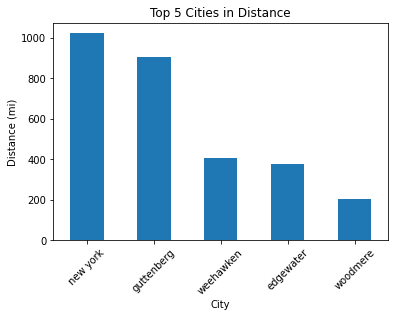

<Figure size 432x288 with 0 Axes>

In [41]:
bycities=new_uber_df_cleaned.groupby("City")["Distance"].sum().sort_values(ascending=False).head(5).plot(kind='bar')

# Set a title for the chart
plt.title("Top 5 Cities in Distance")
plt.ylabel("Distance (mi)")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

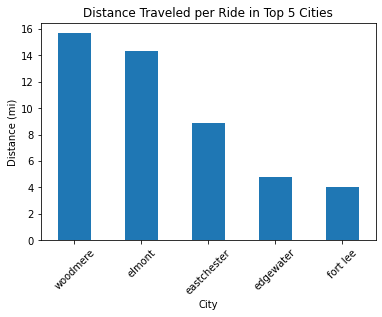

<Figure size 432x288 with 0 Axes>

In [23]:
bycities=new_uber_df_cleaned.groupby("City")["Distance"].sum()
percityspent=bycities/ridespercity
percityspent.sort_values(ascending=False).head(5).plot(kind="bar")
# Set a title for the chart
plt.title("Distance Traveled per Ride in Top 5 Cities")
plt.ylabel("Distance (mi)")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

In [24]:
# Distance Basic Stats - Daniel
uber_stats_df = pd.DataFrame({
    "Average Distance": [uber_df_cleaned["Distance"].mean()],
    "Total of Distances": [uber_df_cleaned["Distance"].sum()],
    "Number of Trips": [uber_df_cleaned["Distance"].count()],
    "Minimum Distance": [uber_df_cleaned["Distance"].min()],
    "Max Distance": [uber_df_cleaned["Distance"].max()]})

uber_stats_df.style.format({"Number of Unique Distances":"{:,.2f}",
                               "Average Distance":"{:,.2f}",
                               "Total of Distances":"{:,.2f}"})

,Average Distance,Total of Distances,Number of Trips,Minimum Distance,Max Distance
0,12.32,"11,861.14",963,0.000453,8666.949918


In [25]:
# Fare Amount Basic Stats - Daniel
uber_fare_dist_df = pd.DataFrame({
    "Average Fare Amount": [uber_df_cleaned["fare_amount"].mean()],
    "Total Fare Amounts": [uber_df_cleaned["fare_amount"].sum()],
    "Number of Trips": [uber_df_cleaned["fare_amount"].count()],
    "Minimum Fare Amount": [uber_df_cleaned["fare_amount"].min()],
    "Max Fare Amount": [uber_df_cleaned["fare_amount"].max()]})



uber_fare_dist_df.style.format({"Average Fare Amount":"${:,.2f}",
                               "Total Fare Amounts":"${:,.2f}",
                               "Minimum Fare Amount":"${:,.2f}"})      

,Average Fare Amount,Total Fare Amounts,Number of Trips,Minimum Fare Amount,Max Fare Amount
0,$11.05,"$10,637.87",963,$-23.70,57.540000


In [26]:
# Identify the trip that has a distance over 8000 - Daniel
uber_df_cleaned[uber_df_cleaned['Distance'] > 8000]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,City,Distance,Time of Day,Zipcode
98869,26362490,2014-08-27 15:37:00.000000102,5.0,2014-08-27 15:37:00+00:00,0.0,0.0,-73.9969,40.74388,3,takoradi,8666.949918,Afternoon,0


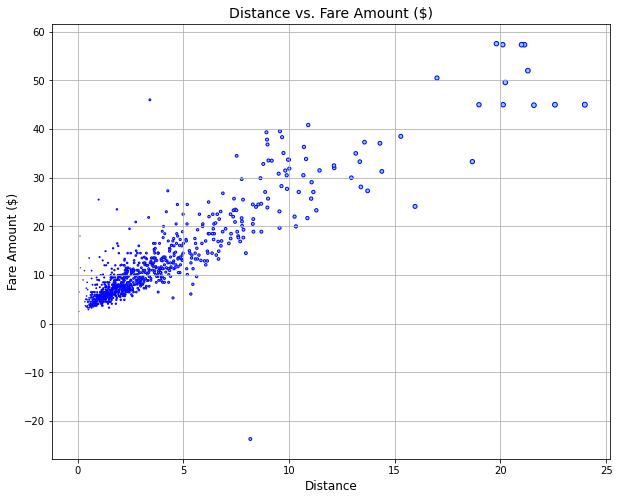

In [27]:
# Distance vs Price (plot) - Daniel
uber_fare = new_uber_df_cleaned['fare_amount']
uber_dist = new_uber_df_cleaned['Distance']

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(uber_dist, uber_fare, uber_dist, marker="o", facecolors="lightskyblue", edgecolors="blue")

# Assign to the plot, title, x label and y label
plt.title("Distance vs. Fare Amount ($)", fontsize=14)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.xlabel("Distance", fontsize=12)
plt.grid()

# Print plot
plt.show()

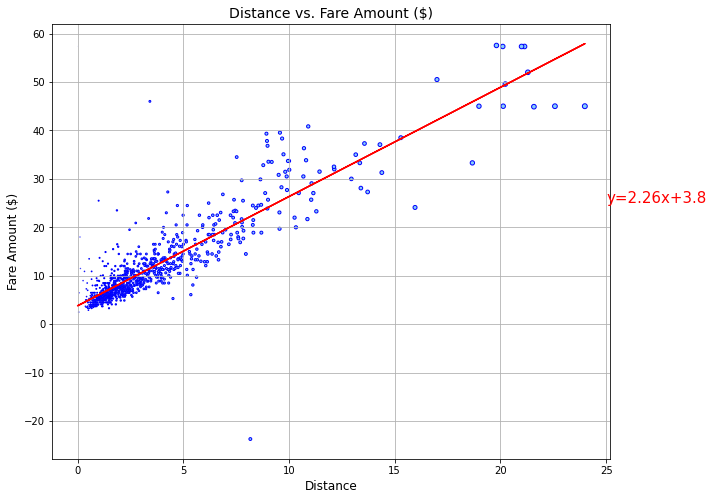

r value: 0.874446308387573


In [28]:
# Distance vs Price plot with Linear Regression - Daniel
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(uber_dist, uber_fare)
regress_values = uber_dist * slope + intercept

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(uber_dist, uber_fare, uber_dist, marker="o", facecolors="lightskyblue", edgecolors="blue")
plt.plot(uber_dist,regress_values,"r-")

line_eq=f"y={round(slope,2)}x+{round(intercept,2)}"

# Assign to the plot, title, x label and y label
plt.title("Distance vs. Fare Amount ($)", fontsize=14)
plt.xlabel("Distance", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.grid()
plt.annotate(line_eq,(25,25),fontsize=15,color="red")

# Print plot
plt.show()
print(f"r value: {rvalue}")

,Mean Pickup Time (hours),Median Pickup Time (hours),Modal Pickup Time (hours),Correlation between time and fare
0,13.886812,15.0,19,-0.019803


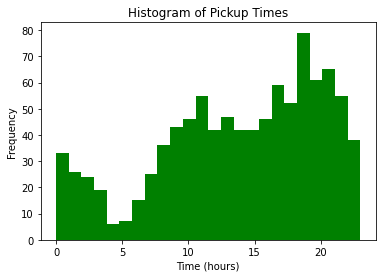

In [29]:
# Most Popular Pick up times & how it correlates to price (plot, basic stats dataframe) -Neil 
#Convert pickup_datetime to datetime object
uber_df_cleaned["pickup_datetime"] = pd.to_datetime(uber_df_cleaned["pickup_datetime"])

#Extract time from datetime object
uber_df_cleaned["pickup_hour"] = uber_df_cleaned.loc[:,"pickup_datetime"].dt.hour




#Generate summary stats, histogram
t=uber_df_cleaned["pickup_hour"]
t_mean = uber_df_cleaned["pickup_hour"].mean() 
t_med = uber_df_cleaned["pickup_hour"].median()
t_mode = uber_df_cleaned["pickup_hour"].mode()
t_corr = t.corr(uber_df_cleaned["fare_amount"], method='pearson')
t_df = pd.DataFrame({"Mean Pickup Time (hours)":t_mean,
                    "Median Pickup Time (hours)":t_med,
                    "Modal Pickup Time (hours)":t_mode,
                   "Correlation between time and fare":t_corr})


plt.hist(t, bins=24, range =(t.min(), t.max()), color='green')
plt.ylabel("Frequency")
plt.xlabel("Time (hours)")
plt.title("Histogram of Pickup Times")
t_df

Text(0.5, 1.0, ' Scatter Plot')

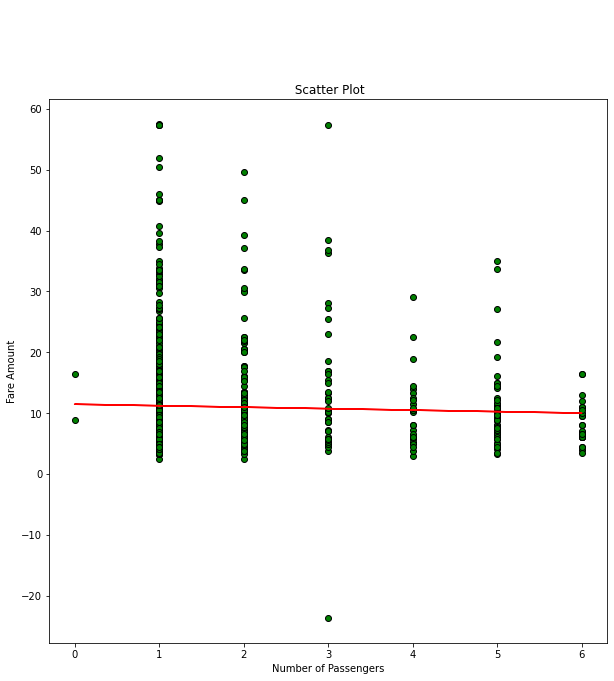

In [30]:
# Price regression on number of passengers (plot, stats)- Neil 
y1 = uber_df_cleaned["fare_amount"]
x1 = uber_df_cleaned["passenger_count"]

#Generate Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x1, y1)
regress_values = slope*x1 + intercept
r_squared = rvalue**2
line_eq = "Fare Amount= " + str(round(slope,2)) + "NumPassengers + " + str(round(intercept,2))


#Generate Plot
plt.scatter(x1,y1, facecolors="green", edgecolors="black")
plt.gcf().set_size_inches(10, 10)
plt.annotate(line_eq,xy=(1.5,75),fontsize=14,color="red")
plt.annotate(f"p={round(pvalue,2)}",xy=(1.5,72),xycoords='data',fontsize=14,color="red")
plt.plot(x1,regress_values,"r-")
plt.xlabel("Number of Passengers")
plt.ylabel("Fare Amount")
plt.title(" Scatter Plot")

#what about per person?

In [31]:
#sorting the datarame with City, Pickup Lats & Lngs, Dropoff Lats & Lngs

all_locations = uber_df_cleaned[['City', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]\
.groupby(uber_df_cleaned['City'])
all_locations.head()

,City,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
88924,new york,40.708630,-74.007551,40.704959,-74.015592
61534,new york,40.732246,-73.987885,40.779616,-73.950564
189468,new york,40.730110,-74.006913,40.724775,-73.994342
90737,edgewater,40.777267,-73.949303,40.880718,-73.878639
113164,guttenberg,40.783964,-73.979891,40.774470,-73.959131
53196,new york,40.707239,-74.004278,40.734992,-74.006031
152337,new york,40.751597,-73.970983,40.734353,-73.978450
141410,weehawken,40.757423,-73.989369,40.768508,-73.861892
167823,edgewater,40.804270,-73.966918,40.768843,-73.862370
189463,woodmere,40.641772,-73.788575,40.759757,-73.985187


In [32]:
#finding out the top cities
city_group = pd.DataFrame(uber_df_cleaned, columns=['City', 'pickup_latitude', 'pickup_longitude', \
                                                    'dropoff_latitude', 'dropoff_longitude'])
top_cities = city_group[['City']].apply(pd.Series.value_counts).head(5).reset_index()["index"].tolist()
top_cities

['new york', 'guttenberg', 'weehawken', 'edgewater', 'woodmere']

In [33]:
#creating the dataframe to get the lats and lngs for pickup citites 
city_group = uber_df_cleaned.groupby("City")[["pickup_latitude", "pickup_longitude"]].mean()

# new_york = city_group.loc[city_group['City']=='new york']
# guttenberg = city_group.loc[city_group['City']=='guttenberg']
# weehawken = city_group.loc[city_group['City']=='weehawken']
# edgewater = city_group.loc[city_group['City']=='edgewater']
# woodmere = city_group.loc[city_group['City']=='woodmere']

top_pickups = city_group.loc[top_cities]
top_pickups

,pickup_latitude,pickup_longitude
City,,
new york,40.731001,-73.992389
guttenberg,40.767848,-73.970625
weehawken,40.754649,-73.990587
edgewater,40.784556,-73.929980
woodmere,40.644986,-73.782301


In [34]:
#creating the dataframe to get the lats and lngs for dropoff citites 

city_group = uber_df_cleaned.groupby("City")[["dropoff_latitude", "dropoff_longitude"]].mean()

# new_york = city_group.loc[city_group['City']=='new york']
# guttenberg = city_group.loc[city_group['City']=='guttenberg']
# weehawken = city_group.loc[city_group['City']=='weehawken']
# edgewater = city_group.loc[city_group['City']=='edgewater']
# woodmere = city_group.loc[city_group['City']=='woodmere']

top_dropoffs = city_group.loc[top_cities]
top_dropoffs

,dropoff_latitude,dropoff_longitude
City,,
new york,40.740128,-73.983061
guttenberg,40.760962,-73.970641
weehawken,40.753259,-73.978632
edgewater,40.770687,-73.957345
woodmere,40.730348,-73.917195


In [35]:
# Configure gmaps
from api_key import g_key
gmaps.configure(api_key=g_key)

In [39]:
#setting pickup locations 
pickup_locations = top_pickups[["pickup_latitude", "pickup_longitude"]]


#setting drop off locations
dropoff_locations = top_dropoffs[["dropoff_latitude", "dropoff_longitude"]]


#creating figure layout 
figure_layout = {'width': '1000px', 
                 'height': '500px', 
                 'border': '1px solid black', 
                 'padding': '0.01px', 
                 'margin': '0 auto 0 auto'}                       
fig = gmaps.figure(layout=figure_layout)

#adding markers 
markers = gmaps.marker_layer(pickup_locations[["pickup_latitude", "pickup_longitude"]])
layerDrop = gmaps.symbol_layer(
dropoff_locations, fill_color='blue', stroke_color='green', scale=5
)
fig.add_layer(markers)
fig.add_layer(layerDrop)

#displaying the figure 
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='0.01px',…

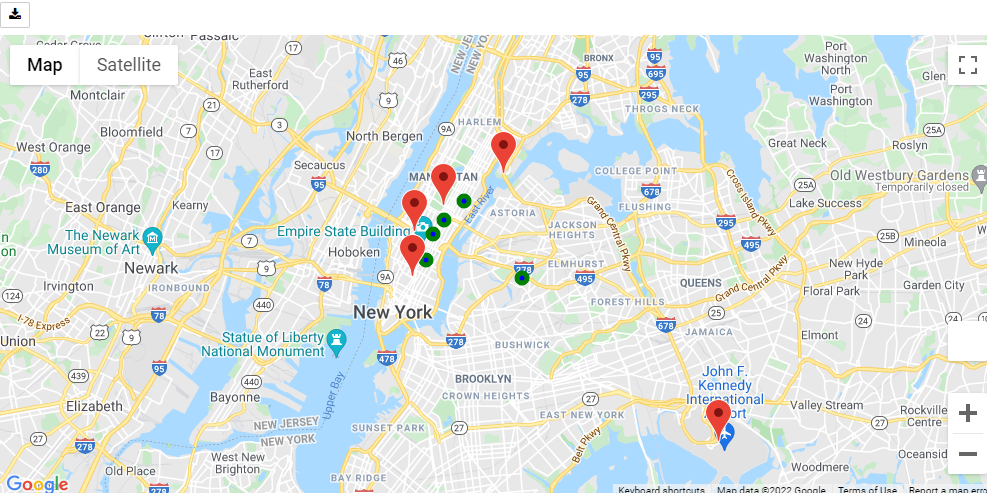